In [3]:
# import the compulsory
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy import ndimage, linalg
%matplotlib inline

In [4]:
train_input = np.load(os.path.abspath(os.path.curdir) + '/ml_zalando_project/things_we_touch/data/input_train.npy')
train_all = np.load(os.path.abspath(os.path.curdir) + '/ml_zalando_project/things_we_touch/data/OG_files/fashion_train.npy')
train_labels = np.load(os.path.abspath(os.path.curdir) + '/ml_zalando_project/things_we_touch/data/labels_train.npy')
train_shaped = np.load(os.path.abspath(os.path.curdir) + '/ml_zalando_project/things_we_touch/data/dilated_input.npy')

In [3]:
def pca(input_array):
    mean_vector = input_array.mean(axis = 0)
    cov_matrix = np.cov(input_array - mean_vector)
    return linalg.eigh(cov_matrix)

In [25]:
w, v = pca(train_input)

In [28]:
w.min()

-2.6114392930557447e-09

In [41]:
def lda(input_array, label_array):
    # step one compute d dimensional mean vectors
    _mean_vectors = []
    for i in range(5):
        current_mean_vector = np.mean(input_array[label_array == i], axis = 0)
        _mean_vectors.append(current_mean_vector)
    
    # compute in-between-class and within-class scatter matrix
    s_w = np.zeros((784,784))
    for cl, mv in zip(range(5), _mean_vectors):
        class_sc_matrix = np.zeros((784,784)) # for each class
        for row in input_array[label_array == cl]:
            row, mv = row.reshape(784,1), mv.reshape(784,1)
            class_sc_matrix += (row - mv).dot((row - mv).T)
        s_w += class_sc_matrix # we have s_w

    s_b = np.zeros((784,784))
    overall_mean = np.mean(input_array, axis = 0)
    for i, _mean_vector in enumerate(_mean_vectors):
        n = input_array[label_array == i, :].shape[0]
        mean_vec = _mean_vector.reshape(784,1)
        overall_mean = overall_mean.reshape(784,1)
        s_b += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)
    # compute eigenvectors and eigenvalues
    eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(s_w).dot(s_b))
    eig_vals = eig_vals.real
    eig_vecs = eig_vecs.real
    #print(len(eig_vecs[0]))
    eig_vals = eig_vals / np.sum(eig_vals)

    return eig_vals, eig_vecs


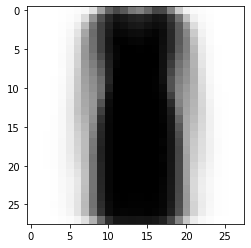

In [20]:
plt.imshow(np.mean(train_shaped[train_labels == 3], axis = 0).reshape(28,28), cmap=plt.cm.gray_r)

In [6]:
np.mean(train_input[train_labels == 3], axis = 0).shape

(784,)

In [42]:
eig_vals, eig_vectors = lda(train_input, train_labels)

In [48]:
eig_vectors[eig_vals == eig_vals.max()].shape

(1, 784)

In [ ]:
2